In [9]:
import numpy as np
c = 0.1
std = 0.1
numP = 9
sum = 0
l = {}
for i in range(1,numP):
    # weight = (1/np.log2(i+1+c))
    base = 2*std*0.1
    weight = (1/np.emath.logn(base, base+i+c))
    l[i] = weight
    sum += weight
for i in range(1,numP):
    l[i] = l[i]/sum
    print (l[i])

0.6352184480851829
0.09580374001617926
0.06326804679510335
0.050844588596558916
0.044079402341190524
0.0397383405969742
0.0366744043399712
0.03437302922883953


In [2]:
import pandas as pd

data = pd.read_csv('w2v_results4users.csv', index_col=0)

In [3]:
data.head()

,num_pubs,num_rlvs,std,NDCG_mr,NDCG_equal,NDCG_weighted,MAX NDCG,MRR_mr,MRR_equal,MRR_weighted,MRR_MAX,P_mr,P_equal,P_weighted,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
researcherID,,,,,,,,,,,,,,,,,,,
R01,4,127,0.291,0.986043,1.000000,0.975265,1.000000,1.0,1.0,1.0,1.0,0.8,0.1,0.8,NaN,NaN,metric values of different user profile model,numbers of user,NaN
R02,12,88,0.146,0.000000,0.761174,0.000000,0.761174,0.0,1.0,0.0,1.0,0.0,0.4,0.0,NaN,NaN,NaN,NaN,NaN
R03,7,60,0.135,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
R04,5,26,0.108,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
R05,2,48,0.000,0.732771,0.913402,0.732829,0.913402,0.5,1.0,0.5,1.0,0.4,0.3,0.3,NaN,NaN,"X,X,X",18,NaN


NDCG: 0.37006807423999993, std: 0.0
NDCG: 0.37006807423999993, std: 0.01
NDCG: 0.37006807423999993, std: 0.02
NDCG: 0.37006807423999993, std: 0.03
NDCG: 0.35006807423999997, std: 0.04
NDCG: 0.35404747432, std: 0.05
NDCG: 0.36006807424000004, std: 0.06
NDCG: 0.37006807424, std: 0.07
NDCG: 0.39787938122, std: 0.08
NDCG: 0.38353629662000005, std: 0.09
NDCG: 0.38098002312000007, std: 0.1
NDCG: 0.38057770632, std: 0.11
NDCG: 0.3862425411000001, std: 0.12
NDCG: 0.38223747718, std: 0.13
NDCG: 0.37362394602000004, std: 0.14
NDCG: 0.37622883158, std: 0.15
NDCG: 0.37622883158, std: 0.16
NDCG: 0.37622883158, std: 0.17
NDCG: 0.37622883158, std: 0.18
NDCG: 0.39044753506, std: 0.19
NDCG: 0.39044753506, std: 0.2
NDCG: 0.39044753506, std: 0.21
NDCG: 0.39044753506, std: 0.22
NDCG: 0.37579211218, std: 0.23
NDCG: 0.37291625592000005, std: 0.24
NDCG: 0.37291625592000005, std: 0.25
NDCG: 0.37291625592000005, std: 0.26
NDCG: 0.37291625592000005, std: 0.27
NDCG: 0.37291625592000005, std: 0.28
NDCG: 0.3729162

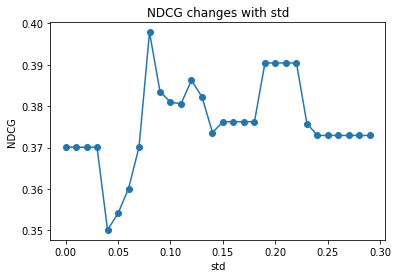

In [32]:
import numpy
import matplotlib.pyplot as plt
ndcg = []
std = []
for i in np.arange(0,0.3,0.01):
    ratio = i
    group1 = data[data['std']>i]['NDCG_mr']
    group2 = data[data['std']<=i]['NDCG_equal']
    # print(len(group1) + len(group2))
    avg_ndcg = (group1.sum() + group2.sum())/(len(group1) + len(group2))
    print(f'NDCG: {avg_ndcg}, std: {i}')
    ndcg.append(avg_ndcg)
    std.append(i)

# Create a line plot
plt.plot(std, ndcg, marker='o')  # 'marker' adds markers on data points
plt.title('NDCG changes over std')
plt.xlabel('std')
plt.ylabel('NDCG')
plt.show()